# Dynamic Time Warping

### Calculate DTW similarity measure of two time series

In [2]:
import pandas as pd
import numpy

import matplotlib.pyplot as plt

from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn import metrics

from scipy.spatial.distance import cdist

In [137]:
ts = pd.read_csv("/Users/joe/Jupyter/Sickle-trait_RNA-seq/salmonQuant/data/counts/TPMs_dropVSA.csv", index_col='ORF')
ts_sub = ts[(ts != 0).all(1)]
idx = list(time_series_sub.index)

In [132]:
ts_3D7_only = ts.iloc[:,:64].copy()
ts_FUP_only = ts.iloc[:,:64:128].copy()

ts_3D7_only = ts_3D7_only[(ts_3D7_only != 0).all(1)]
ts_FUP_only = ts_FUP_only[(ts_FUP_only != 0).all(1)]

In [29]:
time_points = list(range(3, 51,3))

In [173]:
print(ts_3D7_only.columns,ts_FUP_only.columns)

Index(['AA1301_3D7', 'AA1302_3D7', 'AA1303_3D7', 'AA1304_3D7', 'AA1305_3D7',
       'AA1306_3D7', 'AA1307_3D7', 'AA1308_3D7', 'AA1309_3D7', 'AA1310_3D7',
       'AA1311_3D7', 'AA1312_3D7', 'AA1313_3D7', 'AA1314_3D7', 'AA1315_3D7',
       'AA1316_3D7', 'AA1701_3D7', 'AA1702_3D7', 'AA1703_3D7', 'AA1704_3D7',
       'AA1705_3D7', 'AA1706_3D7', 'AA1707_3D7', 'AA1708_3D7', 'AA1709_3D7',
       'AA1710_3D7', 'AA1711_3D7', 'AA1712_3D7', 'AA1713_3D7', 'AA1714_3D7',
       'AA1715_3D7', 'AA1716_3D7', 'AS1501_3D7', 'AS1502_3D7', 'AS1503_3D7',
       'AS1504_3D7', 'AS1505_3D7', 'AS1506_3D7', 'AS1507_3D7', 'AS1508_3D7',
       'AS1509_3D7', 'AS1510_3D7', 'AS1511_3D7', 'AS1512_3D7', 'AS1513_3D7',
       'AS1514_3D7', 'AS1515_3D7', 'AS1516_3D7', 'AS1601_3D7', 'AS1602_3D7',
       'AS1603_3D7', 'AS1604_3D7', 'AS1605_3D7', 'AS1606_3D7', 'AS1607_3D7',
       'AS1608_3D7', 'AS1609_3D7', 'AS1610_3D7', 'AS1611_3D7', 'AS1612_3D7',
       'AS1613_3D7', 'AS1614_3D7', 'AS1615_3D7', 'AS1616_3D7'],
      dtype=

In [255]:
ref = ts_sub.filter(regex='(AA17.*3D7)')
exp = ts_sub.filter(regex='(AS16.*3D7)')
comp = "AA17vAS16_3D7"

In [256]:
i = 0
res = []

for index, row in ref.iterrows():
    x = ref.loc[[index]]
    x.columns = time_points
    y = exp.loc[[index]]
    y.columns = time_points
    dataset = x.append(y, ignore_index=True)
    dataset = dataset.to_numpy()
    dataset = to_time_series_dataset(dataset)
    
    scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
    dataset_scaled = scaler.fit_transform(dataset)

    sz = dataset_scaled.shape[1]

    path, sim = metrics.dtw_path(dataset_scaled[0], dataset_scaled[1])
    
    res.append((index, sim))
    
df = pd.DataFrame(data = res, columns=('ORF', 'dtw_score'))


In [257]:
df = df.sort_values(by = 'dtw_score', ascending = False)
df = df.reset_index(drop=True)
top10 = df.head(n=10)
file = "/Users/joe/Jupyter/Sickle-trait_RNA-seq/TimeSeriesClustering/DTW_scores/{comparison}.csv".format(comparison=comp)
df.to_csv(path_or_buf=file)
top10

,ORF,dtw_score
0,PF3D7_1110300,6.512863
1,PF3D7_0108300,6.291670
2,PF3D7_1433200,6.161733
3,PF3D7_1457700,6.045451
4,PF3D7_1140700,6.041961
5,PF3D7_1456300,5.974186
6,PF3D7_0511400,5.819378
7,PF3D7_1132100,5.695672
8,PF3D7_1313100,5.693971
9,PF3D7_1216900,5.689006


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


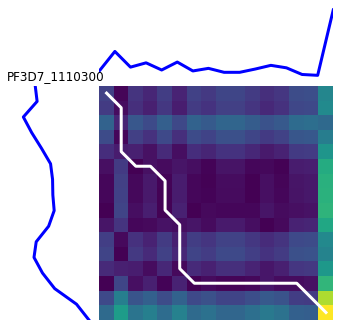

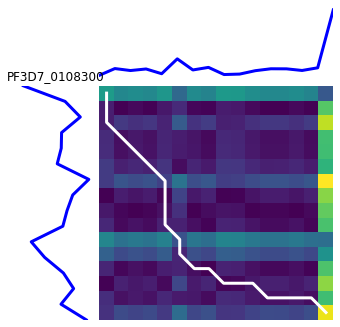

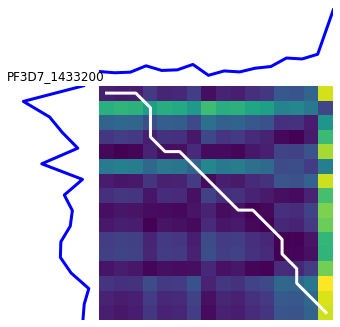

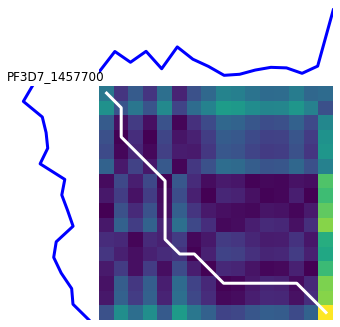

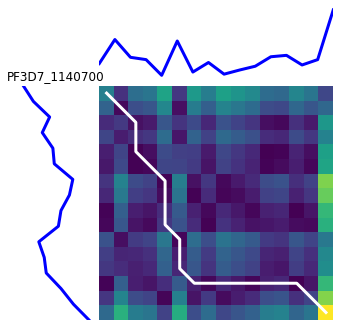

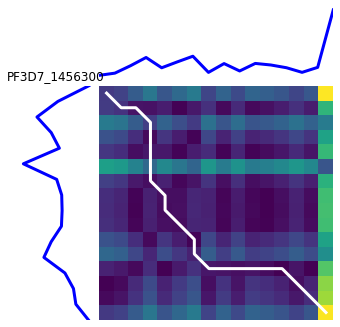

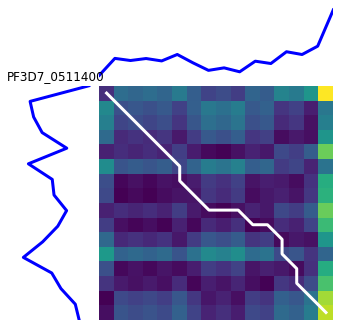

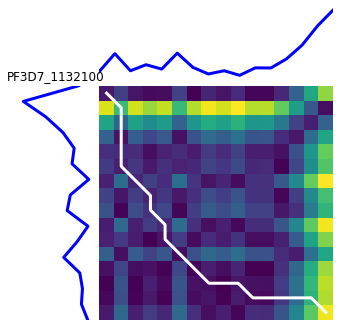

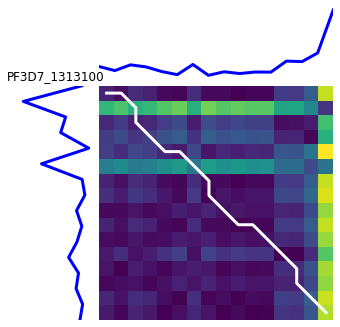

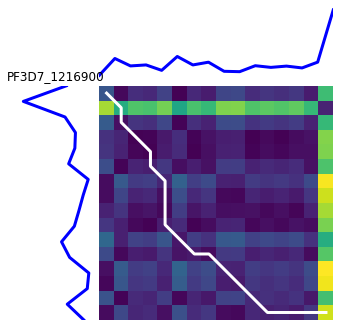

In [258]:
for i in range(len(top10)):
    orf = top10.iloc[i,0]
    x = ref.loc[[orf]]
    x.columns = time_points

    y = exp.loc[[orf]]
    y.columns = time_points
    dataset = x.append(y, ignore_index=True)
    dataset = dataset.to_numpy()
    dataset = to_time_series_dataset(dataset)
    
    scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
    dataset_scaled = scaler.fit_transform(dataset)

    sz = dataset_scaled.shape[1]

    path, sim = metrics.dtw_path(dataset_scaled[0], dataset_scaled[1])

    plt.figure(1, figsize=(5, 5))

    # definitions for the axes
    left, bottom = 0.01, 0.1
    w_ts = h_ts = 0.2
    left_h = left + w_ts + 0.02
    width = height = 0.65
    bottom_h = bottom + height + 0.02

    rect_s_y = [left, bottom, w_ts, height]
    rect_gram = [left_h, bottom, width, height]
    rect_s_x = [left_h, bottom_h, width, h_ts]

    ax_gram = plt.axes(rect_gram)
    ax_s_x = plt.axes(rect_s_x)
    ax_s_y = plt.axes(rect_s_y)

    mat = cdist(dataset_scaled[0], dataset_scaled[1])

    ax_gram.imshow(mat)
    ax_gram.axis("off")
    ax_gram.autoscale(False)
    ax_gram.plot([j for (i, j) in path], [i for (i, j) in path], "w-",
             linewidth=3.)

    ax_s_x.plot(numpy.arange(sz), dataset_scaled[1], "b-", linewidth=3.)
    ax_s_x.axis("off")
    ax_s_x.set_xlim((0, sz - 1))

    ax_s_y.plot(- dataset_scaled[0], numpy.arange(sz)[::-1], "b-", linewidth=3.)
    ax_s_y.axis("off")
    ax_s_y.set_ylim((0, sz - 1))
    plt.title(orf)
    plt.tight_layout()
    plt.show()

In [202]:
orf = 'PF3D7_0113800'
x = ref.loc[[orf]]
x.columns = time_points

y = exp.loc[[orf]]
y.columns = time_points
dataset = x.append(y, ignore_index=True)
dataset = dataset.to_numpy()
dataset = to_time_series_dataset(dataset)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


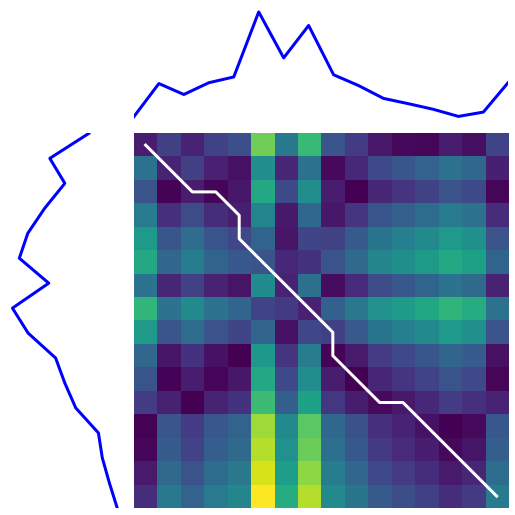

In [197]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset_scaled = scaler.fit_transform(dataset)

sz = dataset_scaled.shape[1]

path, sim = metrics.dtw_path(dataset_scaled[0], dataset_scaled[1])

plt.figure(1, figsize=(8, 8))

# definitions for the axes
left, bottom = 0.01, 0.1
w_ts = h_ts = 0.2
left_h = left + w_ts + 0.02
width = height = 0.65
bottom_h = bottom + height + 0.02

rect_s_y = [left, bottom, w_ts, height]
rect_gram = [left_h, bottom, width, height]
rect_s_x = [left_h, bottom_h, width, h_ts]

ax_gram = plt.axes(rect_gram)
ax_s_x = plt.axes(rect_s_x)
ax_s_y = plt.axes(rect_s_y)

mat = cdist(dataset_scaled[0], dataset_scaled[1])

ax_gram.imshow(mat)
ax_gram.axis("off")
ax_gram.autoscale(False)
ax_gram.plot([j for (i, j) in path], [i for (i, j) in path], "w-",
             linewidth=3.)

ax_s_x.plot(numpy.arange(sz), dataset_scaled[1], "b-", linewidth=3.)
ax_s_x.axis("off")
ax_s_x.set_xlim((0, sz - 1))

ax_s_y.plot(- dataset_scaled[0], numpy.arange(sz)[::-1], "b-", linewidth=3.)
ax_s_y.axis("off")
ax_s_y.set_ylim((0, sz - 1))

plt.tight_layout()
plt.show()